**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

# Question 1 

In [3]:
import numpy as np

In [4]:
# a. Start by imposing each agents initial endowment
w1a = 0.8 
w2a = 0.3
w1b = 1-w1a
w2b = 1-w2a

# b. Calculating their initial utility
max_a = model.utility_A(w1a,w2a)
max_b = model.utility_B(w1b,w2b)

# c. Create an empty vector
better_pairs = []

# d. Loop for x1A and x2a in 

# Outer loop
for x1a in np.linspace(0,1,75):
    x1b = 1-x1a
    # Inner loop
    for x2a in np.linspace(0,1,75):
        x2b = 1-x2a

        current_a = model.utility_A(x1a,x2a)
        current_b = model.utility_B(x1b,x2b)

        if current_a >= max_a and current_b >= max_b:
            better_pairs.append((x1a,x2a))

print(better_pairs)
print(len(better_pairs))

[(0.08108108108108109, 0.945945945945946), (0.08108108108108109, 0.9594594594594595), (0.0945945945945946, 0.8783783783783784), (0.0945945945945946, 0.8918918918918919), (0.0945945945945946, 0.9054054054054055), (0.0945945945945946, 0.918918918918919), (0.0945945945945946, 0.9324324324324325), (0.0945945945945946, 0.945945945945946), (0.0945945945945946, 0.9594594594594595), (0.10810810810810811, 0.8243243243243243), (0.10810810810810811, 0.8378378378378379), (0.10810810810810811, 0.8513513513513514), (0.10810810810810811, 0.8648648648648649), (0.10810810810810811, 0.8783783783783784), (0.10810810810810811, 0.8918918918918919), (0.10810810810810811, 0.9054054054054055), (0.10810810810810811, 0.918918918918919), (0.10810810810810811, 0.9324324324324325), (0.10810810810810811, 0.945945945945946), (0.10810810810810811, 0.9594594594594595), (0.12162162162162163, 0.7702702702702703), (0.12162162162162163, 0.7837837837837838), (0.12162162162162163, 0.7972972972972974), (0.12162162162162163, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


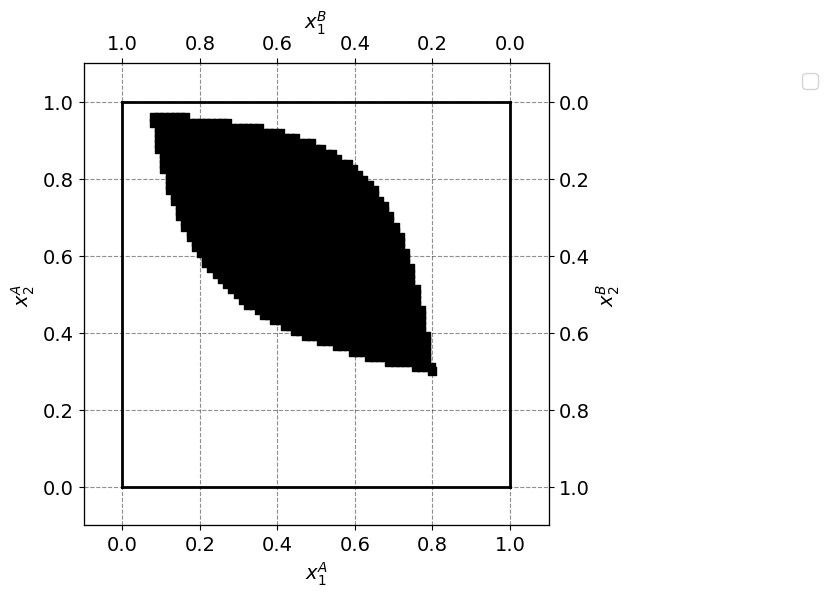

In [41]:
par = model.par
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Inserting out results in the Edgeworth Box
for i in better_pairs:
    ax_A.scatter(i[0],i[1],marker='s',color='black')

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')   

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In [5]:
# Make lists of epsilon
eps1_list = []
eps2_list = []
#
min_sum = 10000
ind = 10000
p1_2 = np.linspace(0.5,2.5,75)

for i, k in enumerate(p1_2):
    eps1, eps2 = model.check_market_clearing(k)

    if abs(eps1) + abs(eps2) < min_sum:
        ind = i
        min_sum = abs(eps1) + abs(eps2)


    eps1_list.append(eps1) 
    eps2_list.append(eps2)
    
print("Minimum sum found at p1 = ",p1_2[ind], "at index", ind, "with value", abs(eps1_list[ind]) + abs(eps2_list[ind]))


Minimum sum found at p1 =  0.9324324324324325 at index 16 with value 0.014936675806240751


In [6]:
print(f'At the price found above the values of epsilons are as follows: \ne1 = {eps1_list[ind]}')
print(f'e2 = {eps2_list[ind]}')

At the price found above the values of epsilons are as follows: 
e1 = 0.007729468599033729
e2 = -0.007207207207207023


# Question 3

We know that if one market clear, then the other market does aswell (Walras law). We will in the following code minimize the $\epsilon_1$ value which should clear the market for good 1 (and good 2).

In [7]:
from scipy import optimize

# We make the objective function that refer to the py.file for epsilon1 
def objective_func(p1):
    eps1, _ = model.check_market_clearing(p1)
    return abs(eps1)

# We learned from question 2, that the market clearing price must be in [0.9,1]
res = optimize.minimize_scalar(
    objective_func,
    bounds=(0,1e6),
    method='bounded')

# We unpack the results
optimal_p1 = res.x
optimal_eps1, _ = model.check_market_clearing(optimal_p1)

print(f"Optimal value of p1: {optimal_p1:.5f} and epsilon value of {optimal_eps1:.5f}")

Optimal value of p1: 0.94445 and epsilon value of -0.00000


We find the price to be 0.944 which clears the market for good 1 and good 2. 

# Question 4

#### a

In [8]:
optimal_utility, optimal_price, optimal_allocation = model.optimal_allocation()
allocation_B = tuple(1-value for value in optimal_allocation)
allocation_x1B, allocation_x2B = allocation_B
optimal_utility_B = model.utility_B(allocation_x1B,allocation_x2B)

print(f"We find that the optimal price is {optimal_price:.5f}, whields yield the utility of agent A, {optimal_utility:5f}")
print(f"hence the consumption for Agent A is (x1, x2) = {optimal_allocation}")
print(f"\nGiven this price, Agent B chooses consumption (x1,x2) = {allocation_B}")
print(f"which yields the utility {optimal_utility_B:.5f}")


We find that the optimal price is 1.90541, whields yield the utility of agent A, 0.633620
hence the consumption for Agent A is (x1, x2) = (0.6217494089834517, 0.6396396396396397)

Given this price, Agent B chooses consumption (x1,x2) = (0.37825059101654834, 0.36036036036036034)
which yields the utility 0.37219


#### b

In [9]:
from scipy.optimize import minimize
def obj(p1):

        x1_B_star,x2_B_star = model.demand_B(p1)

        remaining_x1A = 1 - x1_B_star
        remaining_x2A = 1 - x2_B_star

        if remaining_x1A > 0 or remaining_x2A > 0:
                utility_for_A = model.utility_A(remaining_x1A,remaining_x2A)       
        else:
                utility_for_A = 0

        return -utility_for_A

obj(1.89)

# Assuming you have a 'model' object already defined
res = optimize.minimize_scalar(obj,bounds=(0,10),method='Bounded')

optimal_price = res.x
utility_nu = -res.fun

demand_B = model.demand_B(optimal_price)

print(f'Agent A now sets the price at p = {optimal_price:.5f}. At this price Agent B chooses consumption (x1,x2) = {demand_B}. \nAgent A consumes whats left yielding the utility {utility_nu:.5f}')

Agent A now sets the price at p = 1.89934. At this price Agent B chooses consumption (x1,x2) = (0.37903211247673435, 0.3599563113537216). 
Agent A consumes whats left yielding the utility 0.63362


### 5

Now Agent A chooses Agent B's consumption, but only such that Agent B is not worse off than the initial endowment.

The set available is $C$

$$\underset{(x_{1},x_{2})\in C}{max}u^{A}(x_{1}^{A},x_{2}^{A})$$

In [10]:
def best():
    # initial endowment
    w1a = 0.8 
    w2a = 0.3
    w1b = 1 - w1a
    w2b = 1 - w2a

    # initial utility for B
    initial_utility_A = model.utility_A(w1a, w2a)
    initial_utility_B = model.utility_B(w1b, w2b)
    
    best_x1a, best_x2a, best_x1b, best_x2b = None, None, None, None
    best_utility_A = float('-inf')

    # vælger x1 i intervallet 0-1 og allokerer resten til B
    for x1a in np.linspace(0, 1, 75):
        x1b = 1 - x1a
        # vælger x2 i intervallet 0-1 og allokerer resten til B
        for x2a in np.linspace(0, 1, 75):
            x2b = 1 - x2a

            # definerer den nuværende nytte
            current_utility_A = model.utility_A(x1a, x2a)
            current_utility_B = model.utility_B(x1b, x2b)

            # betinger at den nye nytte skal værre større end den initiale for begge agenter
            if current_utility_A >= initial_utility_A and current_utility_B >= initial_utility_B:
                if current_utility_A > best_utility_A:
                    best_utility_A = current_utility_A
                    best_x1a, best_x2a, best_x1b, best_x2b = x1a, x2a, x1b, x2b
            
    return best_x1a, best_x2a, best_x1b, best_x2b

x1A,x2A,x1B,x2B = best()

print(f'Agent A chooses consumption:      (x1,x2) = ({x1A:.3f},{x2A:.3f})\nAgent B is left with consumption: (x1,x2) = ({x1B:.3f},{x2B:.3f})')
print(f'This leaves Agent A with utility:  {model.utility_A(x1A,x2A):.3f}\nWhich leaves Agent B with utility: {model.utility_B(x1B,x2B):.3f}, which is slighty better than in the endowment')

Agent A chooses consumption:      (x1,x2) = (0.581,0.838)
Agent B is left with consumption: (x1,x2) = (0.419,0.162)
This leaves Agent A with utility:  0.742
Which leaves Agent B with utility: 0.305, which is slighty better than in the endowment


## b

Find the allocation if no further restrictions are imposed

$$
\underset{(x_{1}^{A},x_{2}^{A})\in [0,1]x[0,1]}{max}u^{A}(x_{1}^{A},x_{2}^{A})
$$